# PW 1 - Markovian models  
Sampling of Markovian models.

The aim of this session is to program the Gibbs sampler algorithm and study it in the binary case. 

In this section we consider a binary Markov random field (taking values in $E=\{0,1\}$). 
The neighborhood is defined in 4-connexity and the potential of a clique of order 2 is defined by :
$U_c(0,1)=U_c(1,0)=+\beta$ and $U_c(1,1)=U_c(0,0)=0$ (the potential for singleton clique is 0).


In [ ]:
import math
import random
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

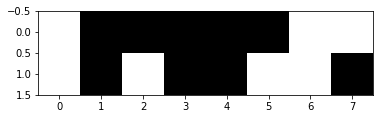

In [ ]:
plt.set_cmap('gray')
 
sh=[2,8]

imaU=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaU)

#Q1 
For the Ising model defined above, and the imaU generated in the previous cell, give the formula of the global energy and give its value as a function of $\beta$ for imaU.



#A1 


The formula of the global energy is : <br>
$ U(x) = \sum_{c \in {C}} V_{c}(x)$
<br>
for this case we have <br> 
$ U(x) = 10\beta $  

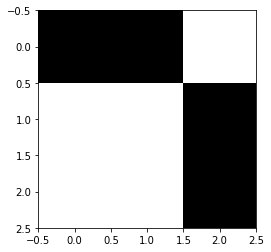

In [ ]:
sh=[3,3]

imaVois=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaVois)

#Q2 

Write the general form of the local conditional probability in a pixel $s$. For the neighborhood configuration imaVois generated by the previous code cell, compute the 2 local conditional energies (for the value 0 and for the value 1 of the central pixel), then the local conditional probabilities (as a function of $\beta$). What is the most probable class ? (NB: do the calculation for an 8-neighborhood).


#A2


The general form of the local conditional probability in a pixel s is given by : <br>
$P_{r}(X_{s} = x_{s} / V_{s}) = exp -U_{s}(x_{s},V_{s})/Z^{s} $ <br>
In the configuration of imaVois that's in the previous cell (we consider the central pixel s) : 

$P_{r}(X_{s} = 0 / V_{s}) = exp -U_{s}(x_{s},V_{s})/Z^{s} = exp -4 \beta / Z^{s}$

$P_{r}(X_{s} = 1 / V_{s}) = exp -U_{s}(x_{s},V_{s})/Z^{s} = exp -4 \beta / Z^{s}$

the two classes are equiprobable.

## Part 1

Programming the Gibbs sampler and drawing samples of Markovian models 



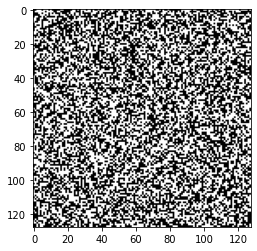

In [ ]:
plt.set_cmap('gray')
 
sh=[128,128]

im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

### Sampling function
Complete the following function which takes as input a binary image (which will be updated by Gibbs sampling) and the value of the regularization parameter.


In [ ]:
def echan(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices 
          # they allow access to neighboring pixels  
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities 
        # energy and non-normalized proba when the pixel is put in class 0
            
            Ureg0=(im_bin[i1,j]+im_bin[i,j2]+im_bin[i2,j]+im_bin[i,j1])*beta_reg
            p0=math.exp(-1*Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1=4*(beta_reg)-Ureg0
            p1=math.exp(-1*Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin

 
By varying the value of the regularization parameter and restarting the cell, observe. You can remove the visualization during sampling and increase the number of iterations

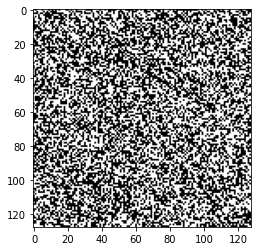

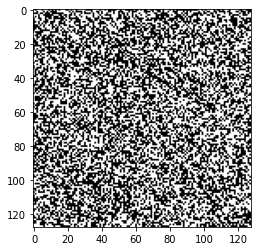

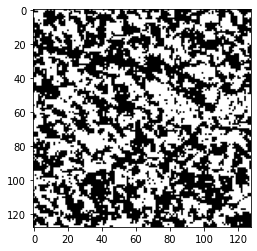

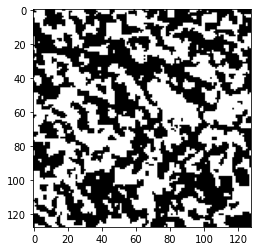

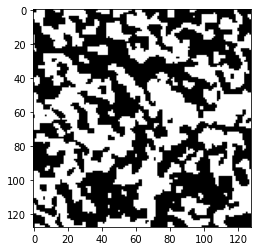

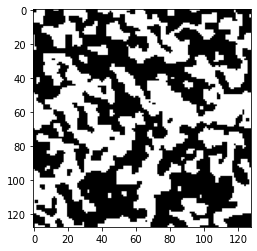

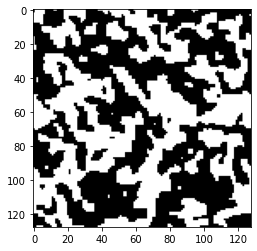

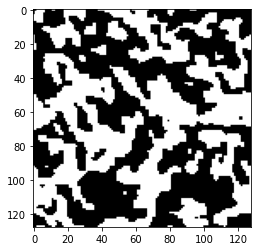

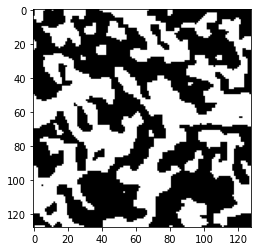

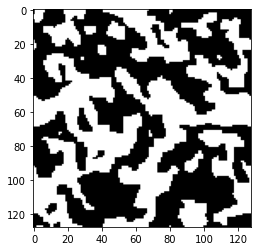

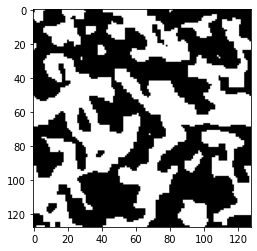

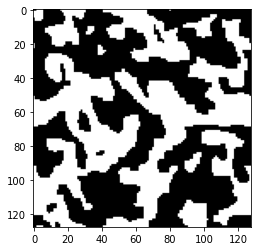

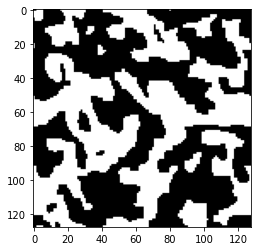

In [ ]:

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg=20

mafigure=plt.figure()
plt.imshow(im_bin);        
mafigure.canvas.draw()
plt.show()

for n in range(10):  
    echan(im_bin,beta_reg) 
    plt.imshow(im_bin)      
    mafigure.canvas.draw()
    plt.show(block=False)
    

plt.figure()
plt.imshow(im_bin)
plt.show()

#Q3
Run the program several times. Do you still get the same image? Comment on this.

#A3

By running the program several times. We don't obtain the same image at each time.
it is logical since we are applying each time random stochastic updates before sampling.

#Q4

Vary $\beta$ from 0.5 to 20. Comment on the results. 

#A4

By varying $\beta $ from 0,5 to 20, we observe that we get zones that are more and more structured.<br>
In fact, the more we increase $\beta$ the more bigger and structured are the zones.


#Q5 
Which image minimizes the overall energy for this model? 

#A5



The image wich minimizes the overall energy for this model is a black or white image. In fact, in this case the global energy will be equal to 0 since we have  $U_c(1,1)=U_c(0,0)=0$ .

#Q6
Change 𝛽 and give it a negative value. Describe the result and justify it.

#A6

When we give a negative value to $\beta $ , we observe that we altern between 0 and 1 for each two neighboring pixels. <br>
<br> when we go to higher negative values of $\beta$ we obtain a $"checkerboard"$ .
<br> It is logical since moving from a black pixel to a white one or moving from a white pixel to a black one gives a negative energy and we are seeking to minimize the energy . that's why we favor the alternation . 

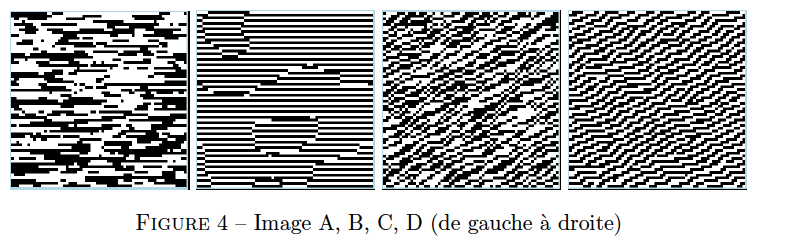

#Q7 
We now work in 8-neighborhood, but still with cliques of order 2 (non-isotropic this time). For each of the following images, propose the clique potentials that allow us to obtain these realizations. Initially all clique potentials are zero. 


* Image A : there is only one clique potential of order 2 which is -1.
* Image B : in addition to the previous one, there is a clique potential of order 2 which is 1. Indicate which one.
* Image C: in addition to the 2 previous ones, there is a clique potential of order 2 which is -1. Indicate which one.
* Image D: in addition to the 3 previous ones, there is a second order clique potential which is +1. Indicate which one.





#A7


1. In the image A, we notice that we have favored the homogenous hotizental lines, so we can say that in the horizental direction we have : <br>
$V_{horizental}(0,0)=V_{horizental}(1,1)=-1$
2. For the image B, we notice that we have an alternation between each two succesive lines. It is like we disfavored that two lines have the same color, ie $ V_{horizentale}(0,0)=V_{horizentale}(1,1) = 1 $ <br>
3.    For the image C, we notice a homogeneous structure which follows the 1st diagonal (at 45°).We favored the direction of the diagonal at 45°.
i.e. $ V_{diagonal45°}(0,0)=V_{diagonal45°}(1,1) = -1 $ <br>
4.For the image D , we notice a structure of alternation in the direction which follows the 2nd diagonal (perpondicular to the first diagonal( 135° )). 
Which means $ V_{diagonal135°}(0,0)=V_{diagonal135°}(1,1) = 1 $ <br>

#Q8

Modify your program to define an Ising model with a diagonal attractive potential only (the other potentials are zero). Comment on the result. 

#A8

In [ ]:
def echan(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices 
          # they allow access to neighboring pixels  
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]
        
        # complete the calculation of energies and associated probabilities 
        # energy and non-normalized proba when the pixel is put in class 0
        # favored 1st diagonal
            Ureg0= ( (-1 *int(im_bin[i2][j1] == 0)  ) + (-1 *int(im_bin[i1][j2] == 0)  )) * beta_reg
            p0=math.exp( -Ureg0 );

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1=  (-1 *int(im_bin[i2][j1] == 1) +  (-1 *int(im_bin[i1][j2] == 1)  )) * beta_reg
            p1=math.exp( -Ureg1  );

        
        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1

    return im_bin

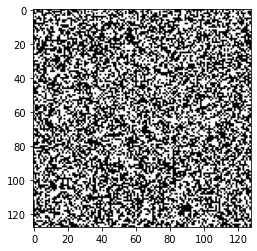

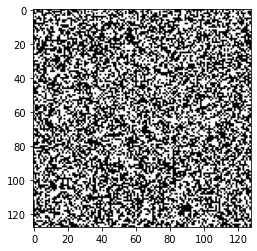

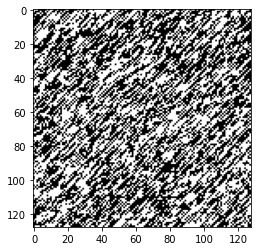

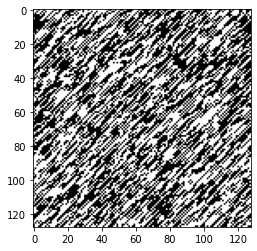

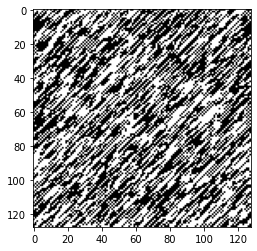

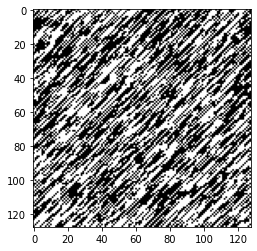

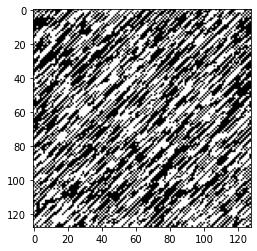

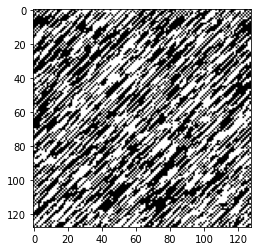

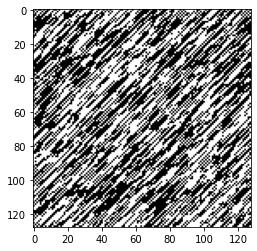

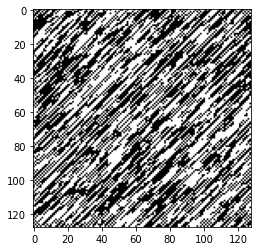

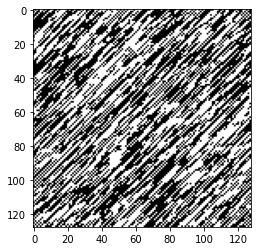

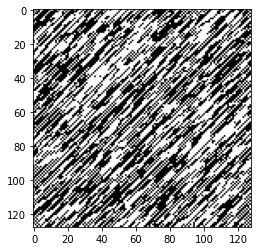

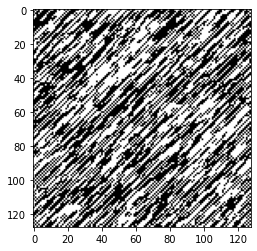

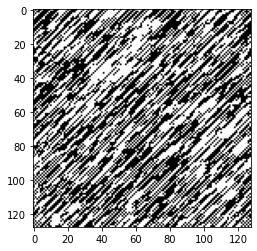

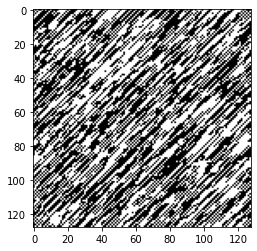

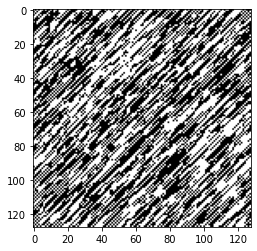

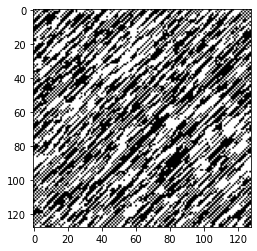

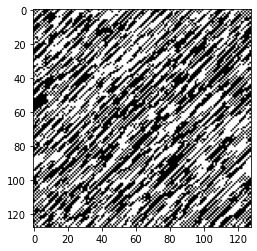

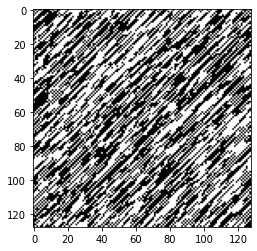

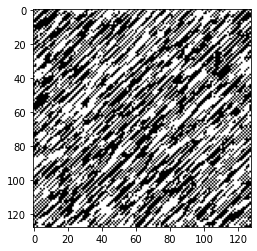

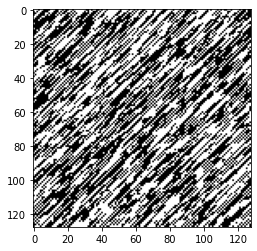

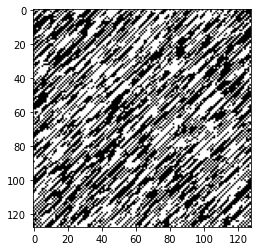

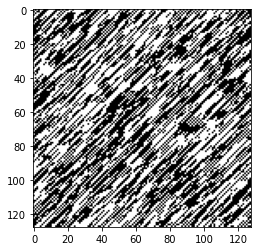

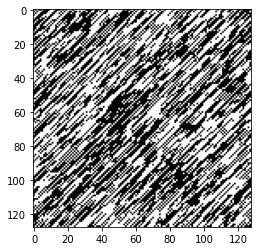

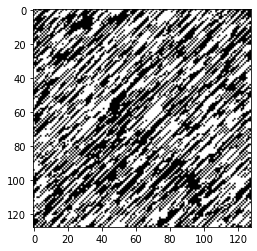

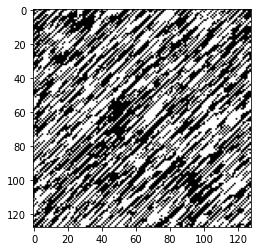

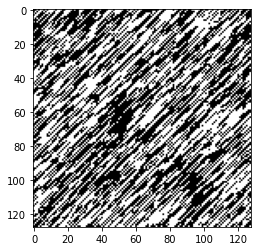

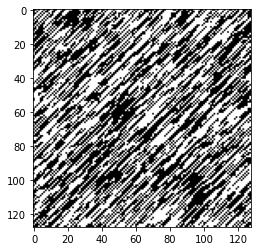

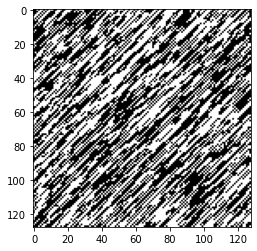

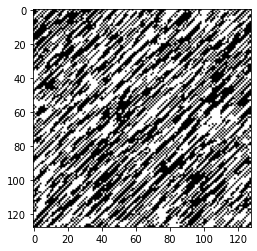

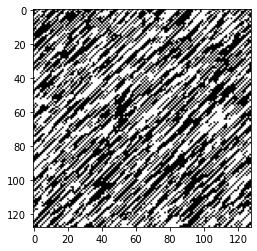

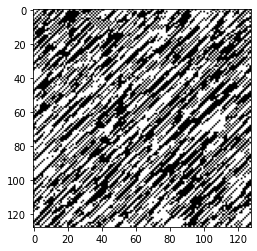

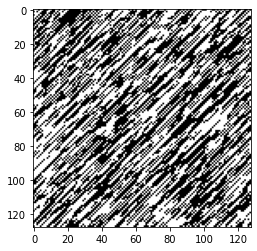

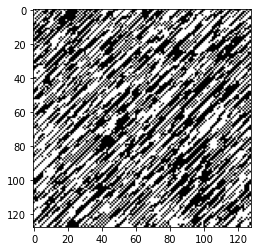

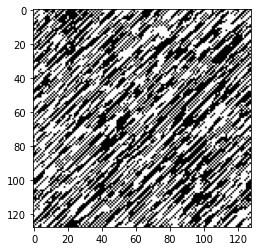

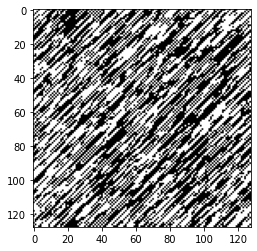

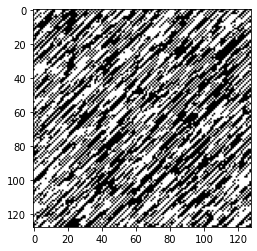

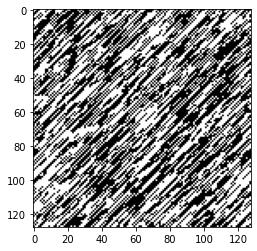

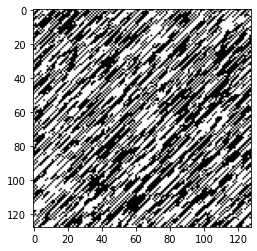

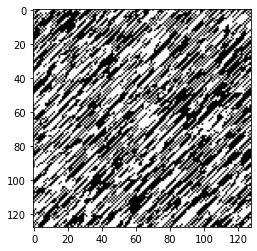

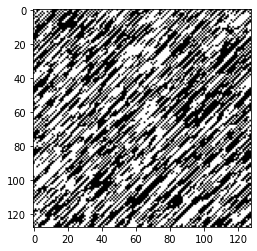

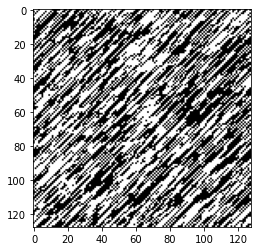

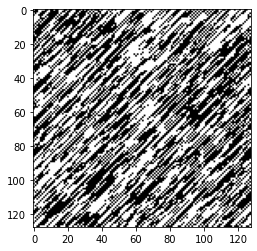

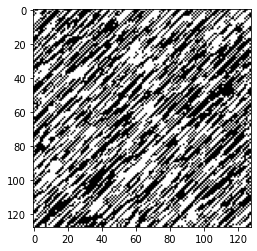

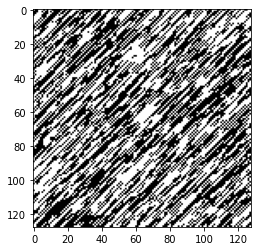

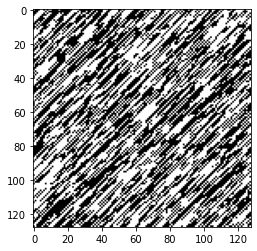

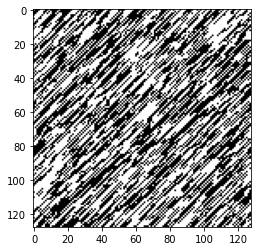

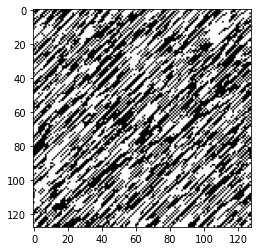

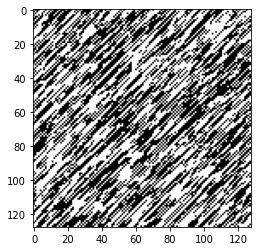

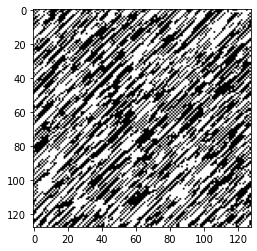

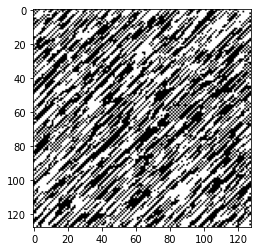

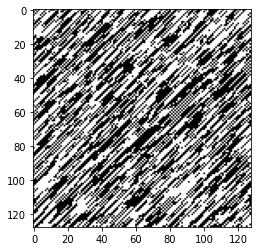

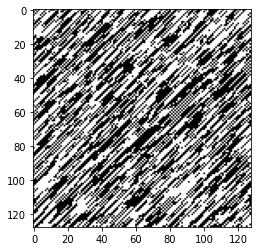

In [ ]:
# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg= 2
mafigure=plt.figure()
plt.imshow(im_bin);        
mafigure.canvas.draw()
plt.show()

for n in range(50):  
    echan(im_bin,beta_reg) 
    plt.imshow(im_bin)      
    mafigure.canvas.draw()
    plt.show(block=False)
    

plt.figure()
plt.imshow(im_bin)
plt.show()